# Dynophore notebook

## Introduction

### What is a dynophore?

* A **dynophore** is a collection of so-called superfeatures. 
* A **superfeature** is defined as a pharmacophore feature on the ligand side &mdash; defined by a feature type and one or more ligand atoms &mdash; that occurs at least once during an MD simulation. Example: HBA[4618] (feature type, ligand atom numbers)
* A superfeature has a **point cloud**, where each point corresponds to the centroid of feature during one frame of the trajectory.
* A superfeature can have one or more interaction partner(s) on the macromolecule side. These interaction partners are called **environmental partners**. Example: GLN-131-A[2057] (residue name, residue number, chain, atom serial numbers).

### How to work with a dynophore?

* **Dynophore raw data** can be analyzed conveniently right here in this notebook by working with the `Dynophore` class.
* **Dynophore 2D view** shows all superfeatures on a 2D view of the structure-bound ligand using `rdkit`.
* **Dynophore 3D view** maps each superfeature's point cloud in 3D using `nglview`, allowing for an easy visual inspection of the dynamic macromolecule-ligand interactions. Point clouds are rendered alongside the complex structure's topology and (optionally) the trajectory underlying the dynophore.
* **Dynophore statistics** cover the occurrence of superfeatures and their environmental partners as well as distances between them.

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%matplotlib widget

In [3]:
from pathlib import Path

import nglview as nv

# Import Dynophore class - contains all dynophore data
import dynophores as dyno

## Set data paths

In [4]:
dyno_path = Path("dynophores-master/dynophores/tests/data/out")
pdb_path = Path("dynophores-master/dynophores/tests/data/in/startframe.pdb")
dcd_path = Path("dynophores-master/dynophores/tests/data/in/trajectory.dcd")

__Note__: You can set `dcd_path = None` in case you do not want to view the trajectory.

## Load data as `Dynophore` object

You can load the dynophore data as `Dynophore` object. We will need this object below for visualization purposes but you can also use the raw data for your own customized analyses.

__Note__: Check out [this tutorial](https://dynophores.readthedocs.io/en/latest/tutorials/explore_data.html) on the dynophore's data structure.

In [5]:
dynophore = dyno.Dynophore.from_dir(dyno_path)

## 2D view

Investigate the dynophore's superfeatures in 2D; display the atom serial numbers (those will show up in the superfeatures' identifiers in the plots below).

In [6]:
dyno.view2d.interactive.show(dynophore)

interactive(children=(Checkbox(value=False, description='Show superfeatures'), Checkbox(value=False, descripti…

## 3D view

Investigate the dynophore in 3D - you have different options that you can change in the method signature below:

* `pdb_path` and `dcd_path` have been defined at the beginning of this notebook; these are the file paths to your complex structure's topology and trajectory (if you do not want to load the trajectory, set `dcd_path=None`).
* `visualization_type`: `spheres` or `points`
  * [Default] Show each frames features as small spheres with `visualization_type=spheres`.
  * [Work-In-Progress] Render the dynophore cloud as more burred and connected points using `visualization_type=points` (still has some NGL rendering issues that we cannot fix on our end, see [NGL GitHub issue](https://github.com/nglviewer/ngl/issues/868))
* `color_cloud_by_frame`: `False` or `True`
  * [Default] Color cloud by superfeature type. Example: The points belonging to a HBA-based superfeature will all be colored red.
  * Color cloud by superfeature type *and* frame index. Example: The points belonging to a HBA-based superfeauture will be colored from red (first frame) to light red (last frame).
* `macromolecule_color`: Set a color for the macromolecule; defaults to blue.
* `frame_range`: Show a selected frame range only, e.g. `frame_range=[100, 1000]`. By default, all frames are shown with `frame_range=None`.

Interact directly with the 3D visualization using the NGL GUI:

* Toogle on/off macromolecule > *cartoon*
* Toogle on/off ligand > *hyperball*
* Toogle on/off pocket residue side chains > *licorice*
* Toogle on/off superfeatures > superfeature identifier e.g. *HBA[4618]*
* Run trajectory if loaded

In [7]:
view = dyno.view3d.show(
    dynophore,
    pdb_path=pdb_path,
    dcd_path=dcd_path,
    visualization_type="spheres",
    color_cloud_by_frame=False,
    macromolecule_color="#005780",
    frame_range=None,
)
view.display(gui=True, style="ngl")

ThemeManager()

NGLWidget(gui_style='ngl', max_frame=1001)

In case a trajectory is loaded, use the `TrajectoryPlayer` for more visualization options:

In [8]:
nv.player.TrajectoryPlayer(view)

## Statistics

### Plot interactions overview (heatmap)

Check how often each superfeature interacts with which environmental partners throughout the MD simulation (in %).

interactive(children=(SelectMultiple(description='Superfeature ID(s)', index=(0,), layout=Layout(width='550px'…

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
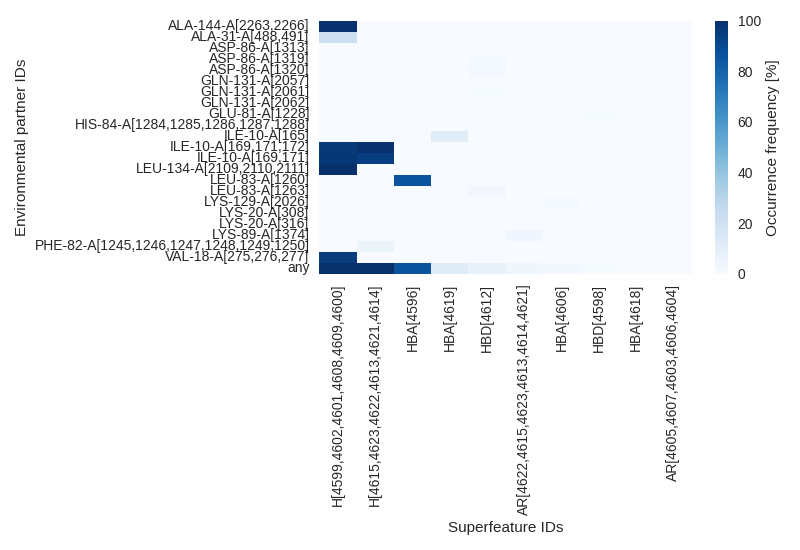

In [9]:
dyno.plot.interactive.superfeatures_vs_envpartners(dynophore)

### Plot superfeature occurrences (time series)

Check when (barcode) and how often (in %) a superfeature $S$ occurs throughout the MD simulation.

$S\,\text{occurrence [%]} = \frac{\text{Number of frames in which}\,S\,\text{occurs}}{\text{Number of frames}} \times 100$

interactive(children=(SelectMultiple(description='Superfeature ID(s)', index=(0,), layout=Layout(width='550px'…

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
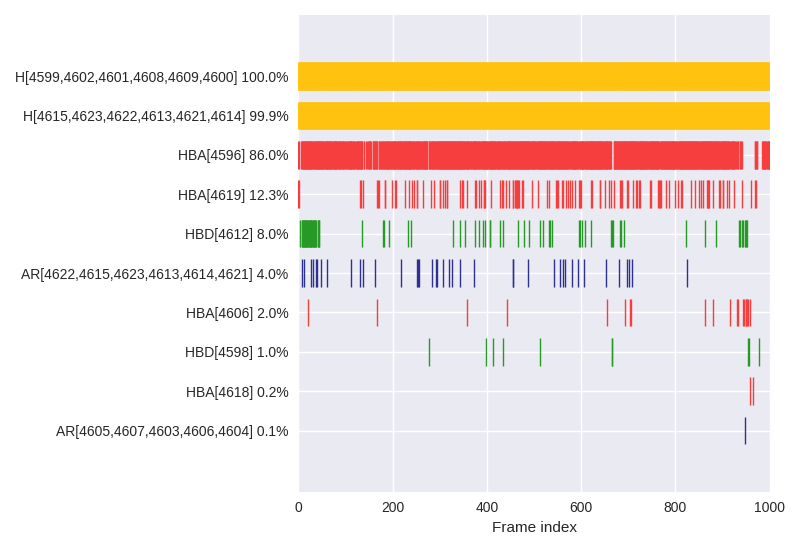

In [10]:
dyno.plot.interactive.superfeatures_occurrences(dynophore)

### Plot interactions for example superfeature (time series)

#### Interaction occurrence

Check when (barcode) and how often (in %\) each environmental partner $E$ interacts in context of a superfeature $S$ ($E_S$).

$E_S\,\text{occurrence [%]} = \frac{\text{Number of frames where}\,E\,\text{interacts in context of}\,S}{\text{Number of frames where}\,S\,\text{occurs}} \times 100$

interactive(children=(SelectMultiple(description='Superfeature ID(s)', index=(0,), layout=Layout(width='550px'…

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
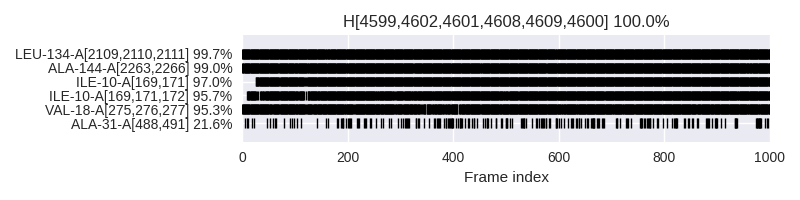

In [11]:
dyno.plot.interactive.envpartners_occurrences(dynophore)

#### Interaction distances

Check for each superfeature, the distances to all environmental partners throughout the MD simulation. 

* **Time series**: Distances are shown for all frames regardless of whether that frame shows an interaction between the environmental partner and the superfeature's ligand atoms or not. Interactions are indicated with a dot in the plot.
* **Histogram**: Only distances are shown that belong to frames in which an interaction between the environmental partner and the superfeature's ligand atoms ocurrs.

interactive(children=(SelectMultiple(description='Superfeature ID(s)', index=(0,), layout=Layout(width='550px'…

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
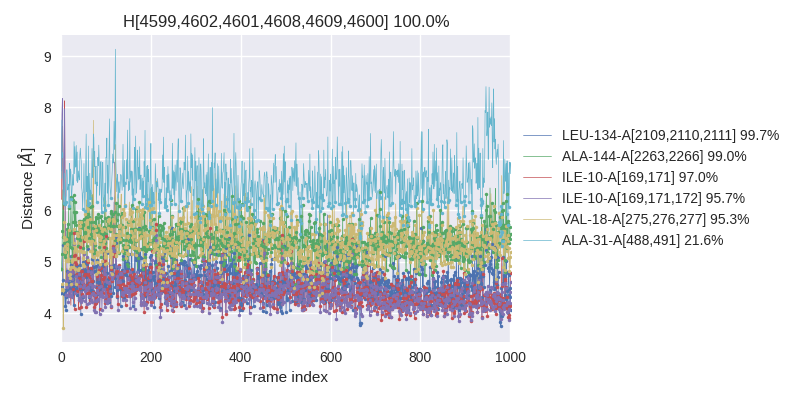

In [12]:
dyno.plot.interactive.envpartners_distances(dynophore)

#### Interaction profile (all-in-one)

This is a summary of the plots shown above. Note that in this case *all* distances throughout the MD simulation are shown (regardless of whether the frame shows an interaction or not).

interactive(children=(Select(description='Superfeature ID(s)', layout=Layout(width='550px'), options=('H[4599,…

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
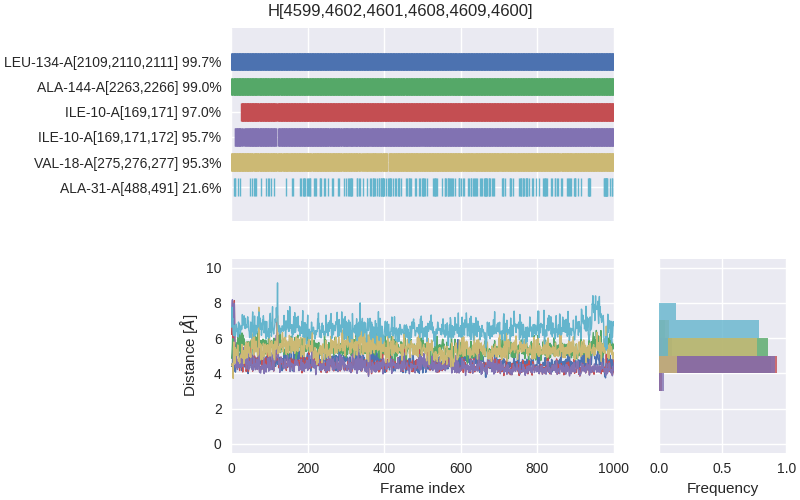

In [13]:
dyno.plot.interactive.envpartners_all_in_one(dynophore)

# Hidden Markov Model

The aim is to derive time information from the dynophore in form of the transition matrix. Therefore, one wants to find the transition probability matrix $\Gamma$. 

1.) Generate Time series of Superfeatures 

2.) Do modelling 

## Generate Time Series

recognize in the above code the sequence of occurences was generated, there is already code to generate the time series

In [14]:
print("There are", dynophore.n_superfeatures, "superfeatures present.")

There are 10 superfeatures present.


As there are 10 superfeatures present, there could be $2^n = 2^{10}=1024$ observations present 

In [15]:
time_ser = dynophore.superfeatures_occurrences
time_ser

,"H[4599,4602,4601,4608,4609,4600]","H[4615,4623,4622,4613,4621,4614]",HBA[4596],HBA[4619],HBD[4612],"AR[4622,4615,4623,4613,4614,4621]",HBA[4606],HBD[4598],HBA[4618],"AR[4605,4607,4603,4606,4604]"
0,1,1,1,1,0,0,0,0,0,0
1,1,1,1,1,0,0,0,0,0,0
2,1,1,0,0,0,0,0,0,0,0
3,1,1,0,0,0,0,0,0,0,0
4,1,1,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
997,1,1,1,0,0,0,0,0,0,0
998,1,1,1,0,0,0,0,0,0,0
999,1,1,1,0,0,0,0,0,0,0
1000,1,1,1,0,0,0,0,0,0,0


### Therefore, there are distinct observations present

In [16]:
cols = dynophore.superfeatures_occurrences.columns.to_list()
print(cols)
dynophore.superfeatures_occurrences[cols[0]]

['H[4599,4602,4601,4608,4609,4600]', 'H[4615,4623,4622,4613,4621,4614]', 'HBA[4596]', 'HBA[4619]', 'HBD[4612]', 'AR[4622,4615,4623,4613,4614,4621]', 'HBA[4606]', 'HBD[4598]', 'HBA[4618]', 'AR[4605,4607,4603,4606,4604]']


0       1
1       1
2       1
3       1
4       1
       ..
997     1
998     1
999     1
1000    1
1001    1
Name: H[4599,4602,4601,4608,4609,4600], Length: 1002, dtype: int32

# Training the HMM 
1.) Find emission matrix 
    ii.) Find number of observations 
2.) Then train model 
3.) Add slider

In [17]:
import matplotlib.pyplot as plt
import numpy as np

In [18]:
time_ser = dynophore.superfeatures_occurrences
obs = time_ser.drop_duplicates()
num_obs = len(obs)
print("There are actually ", num_obs, " present.")
obs = obs.to_numpy()
time_ser = time_ser.to_numpy()
print("The length of the observation sequence is ", len(time_ser))

There are actually  28  present.
The length of the observation sequence is  1002


In [129]:
model = hmm.GaussianHMM(n_components=3, covariance_type="full")

model.startprob_ = np.array([0.6, 0.3, 0.1])

model.transmat_ = np.array([[0.7, 0.2, 0.1],

                            [0.3, 0.5, 0.2],

                            [0.3, 0.3, 0.4]])

model.means_ = np.array([[0.0, 0.0], [3.0, -3.0], [5.0, 10.0]])

model.covars_ = np.tile(np.identity(2), (3, 1, 1))

X, Z = model.sample(100)

In [79]:
model = hmm.GaussianHMM(n_components=5, n_iter=10000, params="st", init_params="st")
model.fit(X)
model.score_samples(X)

(-498.86057892885805,
 array([[2.72043367e-10, 9.46177812e-68, 9.67547028e-11, 1.00000000e+00,
         1.25543787e-54],
        [4.11642368e-01, 1.93064289e-08, 2.70914849e-03, 5.85648464e-01,
         5.70138906e-10],
        [5.39060199e-01, 9.73912645e-04, 1.20926242e-01, 3.39039390e-01,
         2.56425944e-07],
        [6.40942424e-01, 4.92628011e-04, 1.37325668e-01, 2.21232231e-01,
         7.04954487e-06],
        [6.78605531e-01, 3.97163872e-04, 2.09996145e-01, 1.10974552e-01,
         2.66080766e-05],
        [4.99452897e-01, 1.76334869e-03, 4.69137067e-01, 2.95820862e-02,
         6.46011207e-05],
        [1.30692891e-01, 2.20459044e-03, 8.56085484e-01, 1.05443430e-02,
         4.72691868e-04],
        [3.91409099e-02, 3.62276564e-03, 9.22841253e-01, 3.38620376e-02,
         5.33034263e-04],
        [1.04104380e-01, 1.75928962e-03, 6.87854529e-01, 2.06160385e-01,
         1.21416022e-04],
        [3.97425533e-01, 3.41873541e-04, 2.26689942e-01, 3.75504981e-01,
         3.767

In [63]:
from hmmlearn import hmm
model = hmm.GaussianHMM(n_components=5, n_iter=10000, params="st", init_params="st")
model.fit(time_ser)
def calculate_probas(time_ser, model): 
    probas = model.predict_proba(time_ser)
    states = model.predict(time_ser)
    prob_ser = np.zeros(probas.shape)
    for i in range(len(states)):
        prob_ser[i, states[i]] = probas[i, states[i]]
    return np.mean(prob_ser, axis=0)
    

In [64]:
model.score_samples(time_ser)

(9758.260172183447,
 array([[7.31270076e-15, 6.70579424e-36, 1.00000000e+00, 1.69128676e-29,
         7.54976808e-54],
        [5.69501253e-02, 8.43556047e-06, 9.42657362e-01, 3.84068330e-04,
         9.26177867e-09],
        [4.04698152e-02, 9.80889240e-06, 1.58371228e-04, 9.59361998e-01,
         6.57232339e-09],
        ...,
        [9.97716978e-01, 3.30877212e-05, 1.36810096e-03, 8.81686401e-04,
         1.47225752e-07],
        [9.97714399e-01, 3.31104736e-05, 1.36811209e-03, 8.84231678e-04,
         1.47227345e-07],
        [9.97232439e-01, 5.42756676e-05, 1.41091702e-03, 1.30220421e-03,
         1.64280310e-07]]))

In [40]:
model.decode(time_ser)[1]==model.predict(time_ser)

array([ True,  True,  True, ...,  True,  True,  True])

In [20]:
model.monitor_.converged

True

In [21]:
model.transmat_

array([[0.92456935, 0.07543065],
       [0.55506426, 0.44493574]])

In [22]:
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
@interact(num_hidden_states=(1,28))
def markov_model(num_hidden_states):
    model = hmm.GMMHMM(n_components=num_hidden_states, n_iter=10000, params="st", init_params="st")
    model.fit(time_ser)
    plt.cla()
    plt.clf()
    ser = model.predict(time_ser)
    plt.scatter(np.linspace(0,len(ser), len(ser)),ser)
    plt.show()


interactive(children=(IntSlider(value=14, description='num_hidden_states', max=28, min=1), Output()), _dom_cla…

In [23]:
@interact(num_hidden_states=(1,28))
def markov_model(num_hidden_states):
    model = hmm.GaussianHMM(n_components=num_hidden_states, n_iter=10000, params="st", init_params="st")
    model.fit(time_ser)
    plt.cla()
    ser = model.predict(time_ser)
    plt.scatter(np.linspace(0,len(ser), len(ser)),ser)
    plt.show()

interactive(children=(IntSlider(value=14, description='num_hidden_states', max=28, min=1), Output()), _dom_cla…

### There is no need for the Hidden Markov model to be a gaussian mixture model. We could just use the simple Gaussian HMM. However, numerically the Baum-Welch algorithm is not stable and a Monte Carlo based approach should be tested to see if the results are similar. 

# Finding the best hyperparameter 

In [65]:
def calculate_probas(time_ser, model): 
    probas = model.predict_proba(time_ser)
    states = model.predict(time_ser)
    prob_ser = np.zeros(probas.shape)
    for i in range(len(states)):
        prob_ser[i, states[i]] = probas[i, states[i]]
    return np.amin(np.amin(prob_ser, axis=0))

In [67]:
from hmmlearn import hmm
scores = np.zeros(15)
probas = np.zeros(15)
for i in range(1,15):
    model = hmm.GaussianHMM(n_components=i, n_iter=10000)
    try:
        model.fit(time_ser)
        scores[i] = model.score(time_ser)
        probas[i] = calculate_probas(time_ser, model)
    except: 
        scores[i] = 0
        probas[i] = 0


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
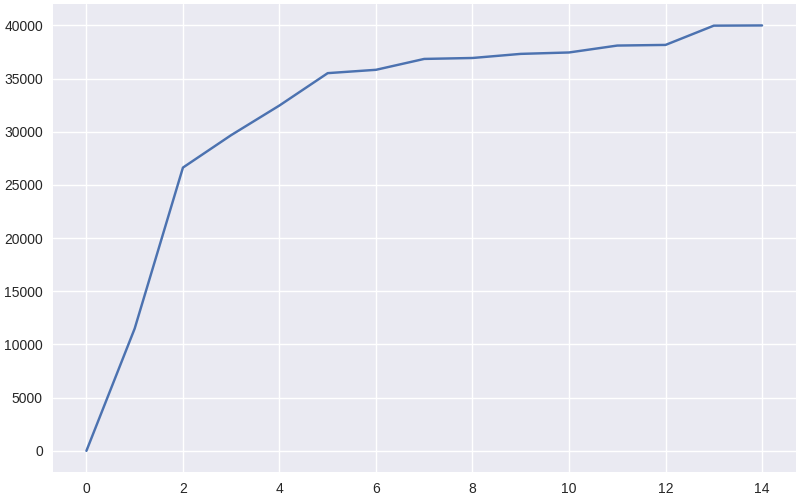

In [68]:
plt.cla()
plt.clf()
plt.plot(scores)
plt.show()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
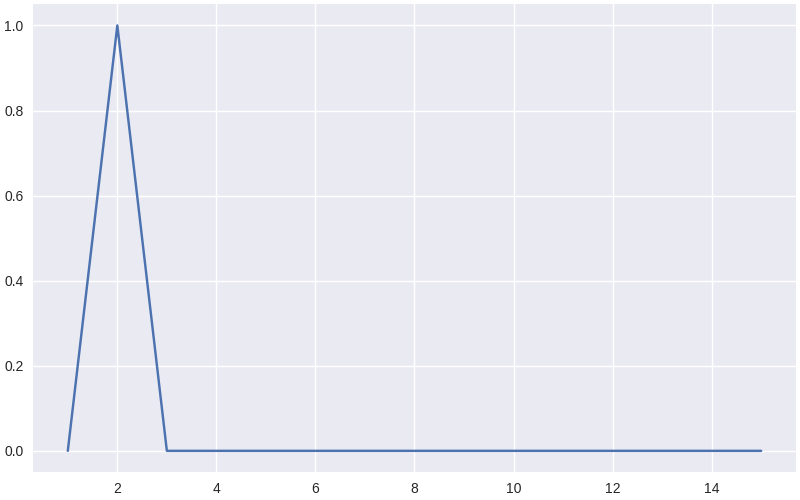

In [47]:
plt.cla()
plt.clf()
plt.plot(np.arange(1,16,1), probas)
plt.show()

In [ ]:
print(probas)

# Example load only the Dynophore Trajectory

In [115]:
import pandas as pd
time_ser = pd.read_json("Trajectories/ZIKV/ZIKV-Pro-427-1_dynophore_time_series.json")
obs = time_ser.drop_duplicates()
num_obs = len(obs)
print("There are actually ", num_obs, " present.")
obs = obs.to_numpy()
time_ser = time_ser.to_numpy()
print("The length of the observation sequence is ", len(time_ser))

There are actually  77  present.
The length of the observation sequence is  5001


In [116]:
from hmmlearn import hmm
num_sim = 10
scores = np.zeros(num_sim)
probas = np.zeros(num_sim)
for i in range(1,num_sim):
    model = hmm.GMMHMM(n_components=i, n_iter=10000, params="st", init_params="st")
    try:
        model.fit(time_ser)
        scores[i] = model.score(time_ser)
        probas[i] = calculate_probas(time_ser, model)
    except: 
        scores[i] = 0
        probas[i] = 0
plt.cla()
plt.clf()
plt.plot(scores)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
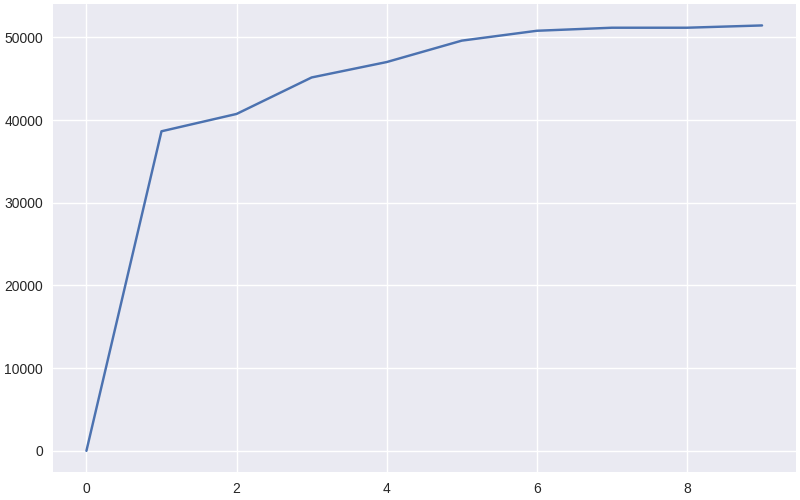

In [117]:
plt.show()

In [118]:
probas

array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0.])

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
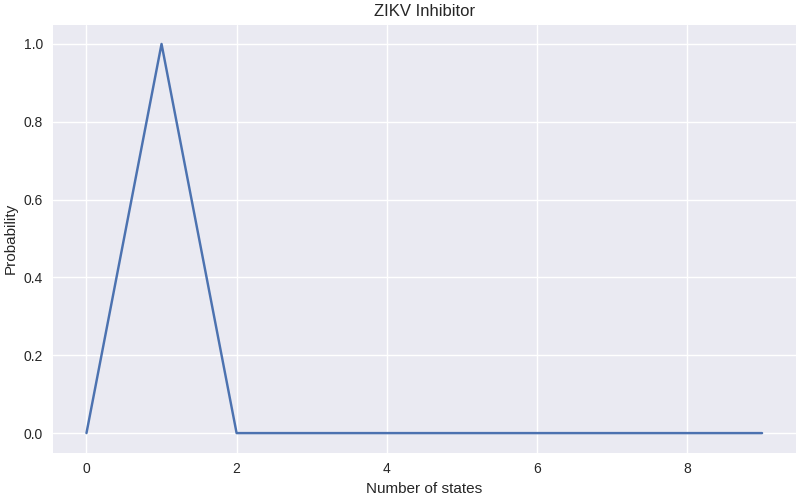

In [119]:
plt.cla()
plt.clf()
plt.title("ZIKV Inhibitor")
plt.xlabel("Number of states")
plt.ylabel("Probability")
plt.plot(probas)
plt.show()

In [120]:
model = hmm.GMMHMM(n_components=2, n_iter=10000, params="st", init_params="st")
model.fit(time_ser)

GMMHMM(covars_prior=array([[[-1.5, -1.5, -1.5, -1.5, -1.5, -1.5, -1.5, -1.5, -1.5, -1.5,
         -1.5, -1.5]],

       [[-1.5, -1.5, -1.5, -1.5, -1.5, -1.5, -1.5, -1.5, -1.5, -1.5,
         -1.5, -1.5]]]),
       covars_weight=array([[[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]],

       [[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]]]),
       init_params='st',
       means_prior=array([[[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]],

       [[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]]]),
       means_weight=array([[0.],
       [0.]]), n_components=2, n_iter=10000,
       params='st', weights_prior=array([[1.],
       [1.]]))

In [121]:
model.transmat_

array([[0.99894747, 0.00105253],
       [0.00363059, 0.99636941]])

In [122]:
#Different Probability function 


In [123]:
from deeptime.decomposition import VAMP, TICA
from deeptime.data import ellipsoids

In [124]:
data = ellipsoids(seed=17)

discrete_trajectory = data.discrete_trajectory(n_steps=1000)

feature_trajectory = data.map_discrete_to_observations(discrete_trajectory)
print(discrete_trajectory)
print(feature_trajectory)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 1 1
 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0
 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 

In [127]:
tica = TICA(dim =10, lagtime=1)

tica = tica.fit(time_ser).fetch_model()

tica_projection = tica.transform(time_ser)

dxy_tica = tica.singular_vectors_left[:, 0]
print(tica_projection)
print(time_ser)

[[-1.56359433e+00  5.61524382e-01  4.39292650e+00 ...  1.27425906e-02
  -3.98442748e-02  8.08724223e-02]
 [-7.31048876e-01  4.28722813e-01  1.99045342e+00 ... -2.78988116e-02
   1.75073968e-01 -3.74831836e-01]
 [-2.96558066e+00  4.52463919e-01  4.22002140e+00 ...  3.60931193e-03
  -2.03617008e-02  4.88848894e-02]
 ...
 [ 3.36603857e-01  4.91591219e-01 -4.25534573e-02 ... -1.77949946e-02
  -9.52754230e-03  1.06425357e-03]
 [ 3.36603857e-01  4.91591219e-01 -4.25534573e-02 ... -1.77949946e-02
  -9.52754230e-03  1.06425357e-03]
 [ 3.36603857e-01  4.91591219e-01 -4.25534573e-02 ... -1.77949946e-02
  -9.52754230e-03  1.06425357e-03]]
[[   1    1    1 ...    1    1 5001]
 [   1    1    1 ...    1    1 5001]
 [   1    1    1 ...    1    0 5001]
 ...
 [   1    1    1 ...    1    1 5001]
 [   1    1    1 ...    1    1 5001]
 [   1    1    1 ...    1    1 5001]]


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
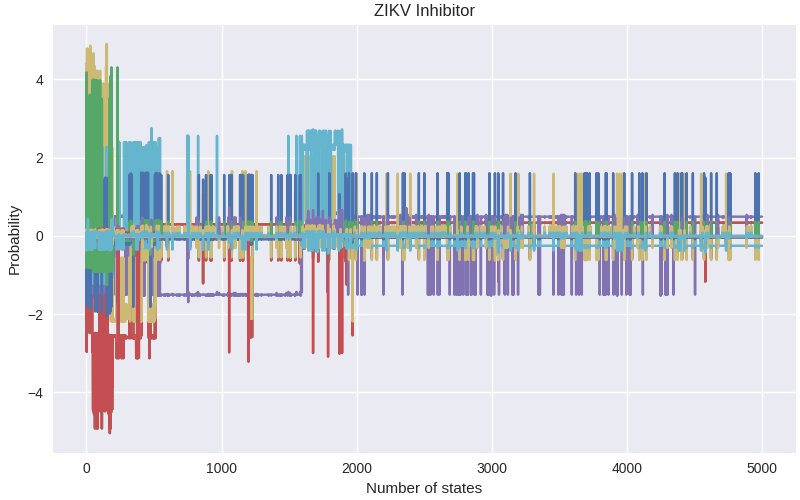

In [128]:
plt.plot(tica_projection)
plt.show()

In [109]:
tica = TICA(dims = 3, lagtime=1)
data = np.random.uniform(size=(1000, 6))
tica = tica.fit(data).fetch_model()
print(data)
print(tica.singular_values)

TypeError: __init__() got an unexpected keyword argument 'dims'

# Monte Carlo Approach